### Pytorch 2일차 
<hr>

## tensor
- 다차원 배열

- class의 속성 : 메서드, 속성(attribute), 필드(field)
    - a1=A()
    - a1.속성명
    - __ 붙이면 외부에서 읽지 못하게 함.
    - get 속성명, set 속성명 ▶ 은닉 속성을 읽어올 수 있음.
    - 

<숫자 자료형> # 복습 필요 --> 시험칠 때 잊어버렸음.

int
- 1byte = char(부호있는 거)/byte
- 2byte = short
- 4byte = int
- 8byte = long

float
- float
- double


CPU tensor ---> 클래스
- torch.XXX

GPU tensor
- torch.cuda.XXX

+ 데이터 타입

<hr>

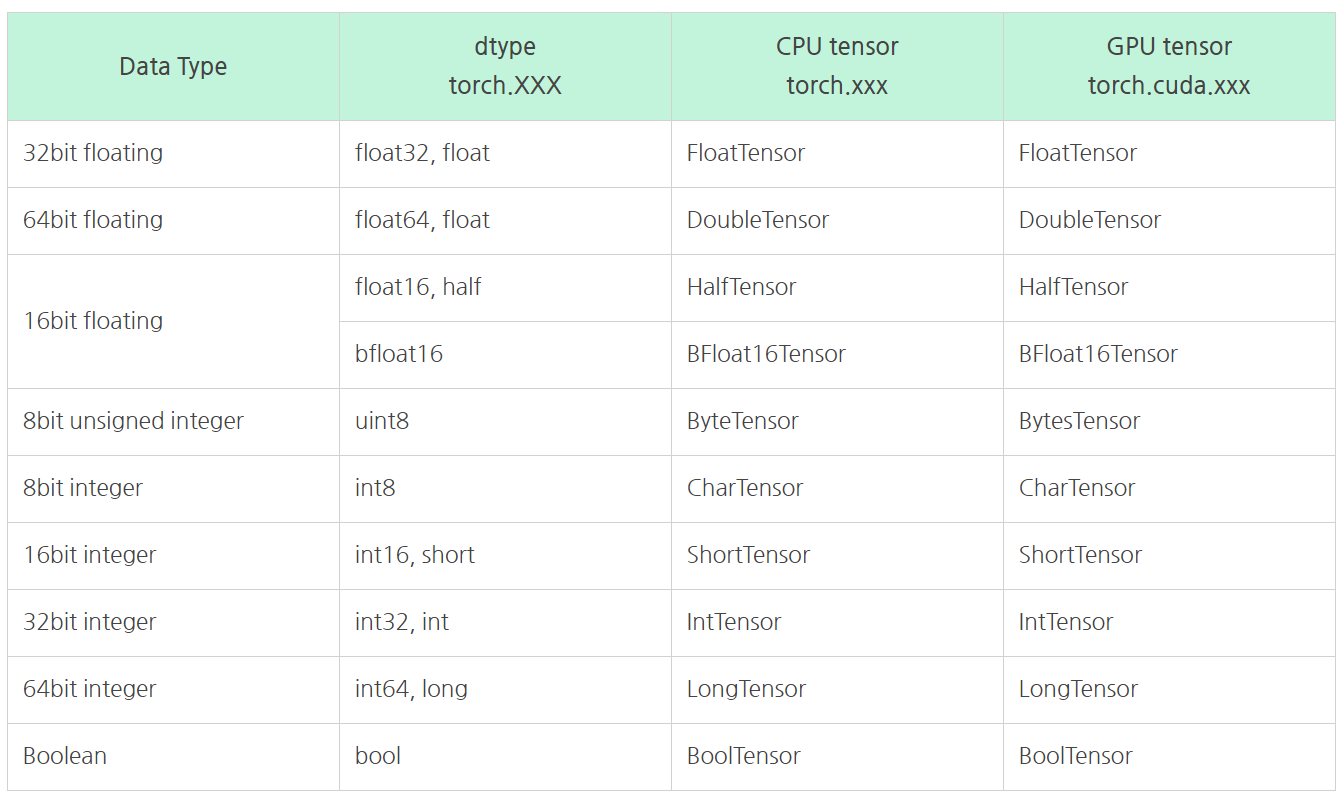

[1] 모듈 로딩 : 

In [1]:
import torch

[2] 속성

In [2]:
# 매개 변수 : 텐서 인스턴스, 텐서 변수명
def print_attr(tensor, name) :
    print(f'[Tensor {name}]\'s Attribute')
    print(f'- tensor.shape : {tensor.shape}') # 텐서.shape : 해당 텐서의 사이즈를 알려줌.
    print(f'- tensor.ndim : {tensor.ndim}D') # 텐서.ndim : 해당 텐서의 차원을 알려줌.
    print(f'- tensor.dtype : {tensor.dtype}') # 텐서.dtype : 해당 텐서의 데이터 타입(int, float 등)을 알려줌.
    print(f'- tensor.device : {tensor.device}') # 텐서.device : 해당 텐서의 디바이스를 알려줌. 기본 cpu이고 gpu를 지정할 수 있음.
    print(f'- tensor.requires_grad : {tensor.requires_grad}') # 텐서.requires_grad : 텐서의 requires_grad 설정 값(True/False)를 알려줌 (기울기계산 기능.) True 경사하강법에 따라서 기울기를 자동 업데이트해줌.
    print(f'- tensor.data : {tensor.data}') # 텐서.data 데이터 확인?
    print()

[2] Tensor 생성
- Tensor 생성 (1) 특정 데이터 타입의 Tensor 생성
    * 타입별 텐서 클래스 생성자 활용
    * 예) IntTensor(), FloatTensor(), BoolTensor()

[2-1] 특정 데이터 타입의 Tensor 생성

In [3]:
t1 = torch.IntTensor(10) # 괄호안에는 shape...?
t2 = torch.IntTensor([10, 22]) # 정수 타입 텐서 생성 : 실수인 10.0를 넣어도 정수로 변환해줌. but 소수점 뒷자리를 날리기 때문에 손실 관련 warning 발생.
t3 = torch.BoolTensor([1,1,0,-1]) # bool 타입 텐서 생성
t4 = torch.FloatTensor([10, 20]) # 실수 타입 텐서 생성 : 정수로 넣어도 실수로 변환.

In [4]:
print_attr(t1, 't1')

print_attr(t2,'t2')

print_attr(t3,'t3')

print_attr(t4,'t4')

[Tensor t1]'s Attribute
- tensor.shape : torch.Size([10])
- tensor.ndim : 1D
- tensor.dtype : torch.int32
- tensor.device : cpu
- tensor.requires_grad : False
- tensor.data : tensor([-675278416,        995,          0,          0,          0,          0,
                 0,          0,          0,          0], dtype=torch.int32)

[Tensor t2]'s Attribute
- tensor.shape : torch.Size([2])
- tensor.ndim : 1D
- tensor.dtype : torch.int32
- tensor.device : cpu
- tensor.requires_grad : False
- tensor.data : tensor([10, 22], dtype=torch.int32)

[Tensor t3]'s Attribute
- tensor.shape : torch.Size([4])
- tensor.ndim : 1D
- tensor.dtype : torch.bool
- tensor.device : cpu
- tensor.requires_grad : False
- tensor.data : tensor([ True,  True, False,  True])

[Tensor t4]'s Attribute
- tensor.shape : torch.Size([2])
- tensor.ndim : 1D
- tensor.dtype : torch.float32
- tensor.device : cpu
- tensor.requires_grad : False
- tensor.data : tensor([10., 20.])



[2-2] 원하는 값으로 텐서 생성 => torch.tensor()

##### + scalar
- 하나의 값만을 가지는 텐서
- 단일 숫자 값을 의미
- 차원이 없는 텐서.
    - 0차원 : 스칼라 / 1차원 : 벡터(방향성을 가지고 있는 좌표와 원점 사이의 거리..?) / 2차원 : 행렬 Matrix / 3 차원 : 텐서 tensor

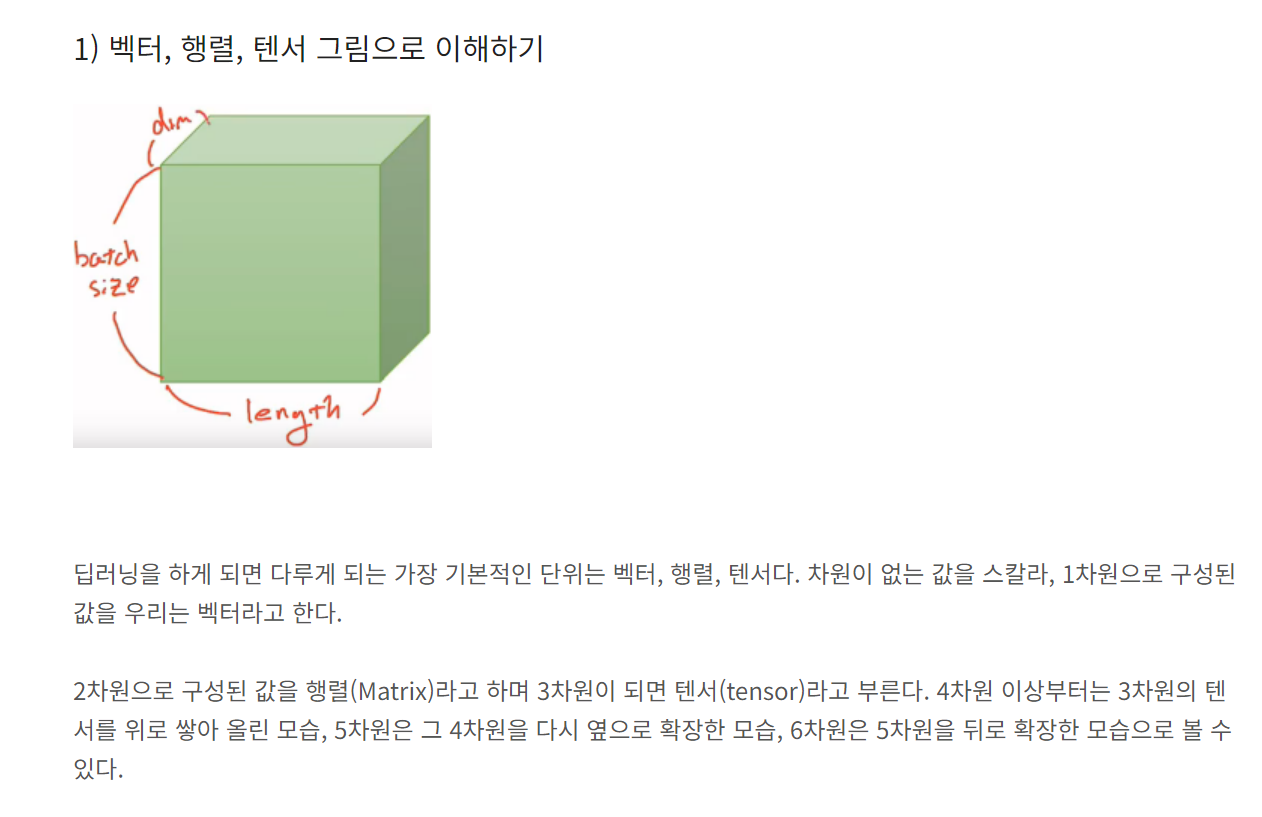

In [5]:
t1 = torch.tensor(10) # scalar 데이터, int64
print_attr(t1, 't1')

[Tensor t1]'s Attribute
- tensor.shape : torch.Size([])
- tensor.ndim : 0D
- tensor.dtype : torch.int64
- tensor.device : cpu
- tensor.requires_grad : False
- tensor.data : 10



- dtype 매개변수 : 원하는 데이터 타입 지정 가능 

In [6]:
t1 = torch.tensor(10., dtype=torch.int32) #scalar 데이터, int6int32 ==> DeprecationWarning 발생
print_attr(t1, 't1')

[Tensor t1]'s Attribute
- tensor.shape : torch.Size([])
- tensor.ndim : 0D
- tensor.dtype : torch.int32
- tensor.device : cpu
- tensor.requires_grad : False
- tensor.data : 10



C:\Users\KDP-48\AppData\Local\Temp\ipykernel_35160\501082324.py:1: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  t1 = torch.tensor(10., dtype=torch.int32) #scalar 데이터, int6int32 ==> DeprecationWarning 발생


In [7]:
# 1D 데이터 - 정수형 int8
t1 = torch.tensor([1,2,3], dtype=torch.int8)
print_attr(t1, 't1')

[Tensor t1]'s Attribute
- tensor.shape : torch.Size([3])
- tensor.ndim : 1D
- tensor.dtype : torch.int8
- tensor.device : cpu
- tensor.requires_grad : False
- tensor.data : tensor([1, 2, 3], dtype=torch.int8)



In [8]:
# 2D 데이터
t1 = torch.tensor([[1,2,3]], dtype=torch.int8)
print_attr(t1, 't1')

[Tensor t1]'s Attribute
- tensor.shape : torch.Size([1, 3])
- tensor.ndim : 2D
- tensor.dtype : torch.int8
- tensor.device : cpu
- tensor.requires_grad : False
- tensor.data : tensor([[1, 2, 3]], dtype=torch.int8)



[2-3] 특정 값으로 채운 텐서 => 0, 1 등의 값

- torch.zeros() 

In [9]:
''' torch.zeros(*size: _int, # 사이즈
    out: Tensor | None = None, # 반환값 = 텐서
    dtype: _dtype | None = None,
    layout: _layout | None = None,
    device: DeviceLikeType | None = None,
    pin_memory: _bool | None = False,
    requires_grad: _bool | None = False)'''

' torch.zeros(*size: _int, # 사이즈\n    out: Tensor | None = None, # 반환값 = 텐서\n    dtype: _dtype | None = None,\n    layout: _layout | None = None,\n    device: DeviceLikeType | None = None,\n    pin_memory: _bool | None = False,\n    requires_grad: _bool | None = False)'

In [20]:
# 0으로 채운 텐서
t1 = torch.zeros(5)
print_attr(t1, 't1')

[Tensor t1]'s Attribute
- tensor.shape : torch.Size([5])
- tensor.ndim : 1D
- tensor.dtype : torch.float32
- tensor.device : cpu
- tensor.requires_grad : False
- tensor.data : tensor([0., 0., 0., 0., 0.])



In [11]:
'''
ones(
    size: Sequence[_int | SymInt],
    *,
    out: Tensor | None = None,
    dtype: _dtype | None = None,
    layout: _layout | None = None,
    device: DeviceLikeType | None = None,
    pin_memory: _bool | None = False,
    requires_grad: _bool | None = False
) -> Tensor
'''

'\nones(\n    size: Sequence[_int | SymInt],\n    *,\n    out: Tensor | None = None,\n    dtype: _dtype | None = None,\n    layout: _layout | None = None,\n    device: DeviceLikeType | None = None,\n    pin_memory: _bool | None = False,\n    requires_grad: _bool | None = False\n) -> Tensor\n'

In [23]:
# 1으로 채운 텐서
t1 = torch.ones((2,4), dtype = torch.int8)
print_attr(t1, 't1')

[Tensor t1]'s Attribute
- tensor.shape : torch.Size([2, 4])
- tensor.ndim : 2D
- tensor.dtype : torch.int8
- tensor.device : cpu
- tensor.requires_grad : False
- tensor.data : tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int8)



In [13]:
# 이미 존재하는 텐서와 동일한 shape으로 잡고 0 또는 1 또는 원하는 값으로 채우기 
#=> zeros_like(), ones_like()
img=torch.tensor([[2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7]])
print(img.shape)
print()

# 이미 존재하는 텐서와 동일한 shape에 0 채우기.
zero_img = torch.zeros_like(img)
print(zero_img)
print()

ones_img = torch.ones_like(img)
print(ones_img)
print()

full_img = torch.full_like(img, 7)
print(full_img)

torch.Size([2, 6])

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]])

tensor([[1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1]])

tensor([[7, 7, 7, 7, 7, 7],
        [7, 7, 7, 7, 7, 7]])


In [14]:
# 대각선 방향으로 1 채우기 = eye()
t1 = torch.eye(5) # 5x5 행렬 생성 후 대각선으로 1 채우기
print(t1)
print()

# 대각선 방향으로 1 채우기 = eye()
t1 = torch.eye(2, 3) # 2x3 행렬 생성 후 대각선으로 1 채우기
print(t1)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

tensor([[1., 0., 0.],
        [0., 1., 0.]])


[2-4] 임의의 값으로 Tensor 생성 => torch.rand(), torch.randn(), torch.randint()

In [15]:
torch.manual_seed(12) # 랜덤 초기값 설정.
t5 = torch.rand(2,3) # [0, 1) 분포 안에서 랜덤 생성
t6 = torch.randn(2, 3) # standard normal 분포에서 랜덤 생성
t7 = torch.randint(low=1, high =10, size = (2, 3)) # (low, high, size) low<= 값 < high
print(t5, t6, t7, sep='\n\n')

tensor([[0.4657, 0.2328, 0.4527],
        [0.5871, 0.4086, 0.1272]])

tensor([[ 1.5869,  1.1268, -1.2274],
        [-0.8216, -1.7861,  0.6167]])

tensor([[8, 4, 6],
        [2, 2, 2]])


[2-5] Ndarray 객체 활용 => torch.from_numpy(), torch.as_tensor(), tensor()

In [16]:
import numpy as np

data = np.array([11, 22, 33]) # numpy.ndarray 데이터 생성.

t1 = torch.from_numpy(data) # np.array ▶ tensor 변환 # Sharing

print(t1) 

t2 = torch.as_tensor(data) # np.array 타입 ▶ tensor 변환 # Sharing
print(t2)

t3 = torch.tensor(data) # np.array 타입 ▶ tensor 변환 # Copy
print(t3)

# ndarray 원소 변경
data[0] =100

# from_numpy(), as_tensor() => 데이터 공유
# tensor() => 복사본 생성

print(data, t1, t2, t3, sep='\n\n') # t1, t2는 변경. t3는 변경X 

tensor([11, 22, 33], dtype=torch.int32)
tensor([11, 22, 33], dtype=torch.int32)
tensor([11, 22, 33], dtype=torch.int32)
[100  22  33]

tensor([100,  22,  33], dtype=torch.int32)

tensor([100,  22,  33], dtype=torch.int32)

tensor([11, 22, 33], dtype=torch.int32)
